<a href="https://colab.research.google.com/github/TAUforPython/wavelets/blob/main/wavelets_cwt_%2B_dwt_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pywavelets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# устанавливаем библиотеки 
import pywt
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# гармонический детерминированный сигнал 
# число точек в выборке
N = 60*5
# задаем максимальное время (конечное) чуть больше чеме 2*pi, начало отсчета в нуле.
T = 5.0 
t = np.linspace(0.0, T, N)

y = np.cos(1.0 * 2.0*np.pi*t) + 1 * np.cos(12.0 * 2.0*np.pi*t) + 1*np.sin(3.0 * 2.0*np.pi*t)

In [16]:
# затукающий гармонический сигнал
y = np.exp(-t)*np.sin(3.0 * 2.0*np.pi*t)

In [ ]:
# ступенчатный детерминированный сигнал 
events = [2.5, 4]
w1=0.5; w2=1;
y = 1*((t > events[0]-w1) & (t < events[0]+w1)) + \
    0* ((t > events[1]-w2) & (t < events[1]+w2))

In [ ]:
# случайный сигнал
y = np.sin(3.0 * 2.0*np.pi*t) + np.random.normal(0, scale=0.5, size=len(t))


In [ ]:
# экспонента
y = 1 - np.exp(-t) + 0*np.random.normal(0, scale=0.5, size=len(t))

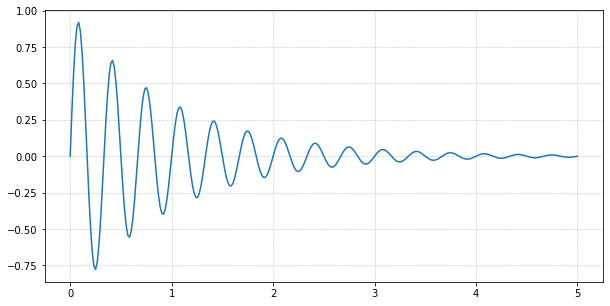

In [17]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(t, y)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()

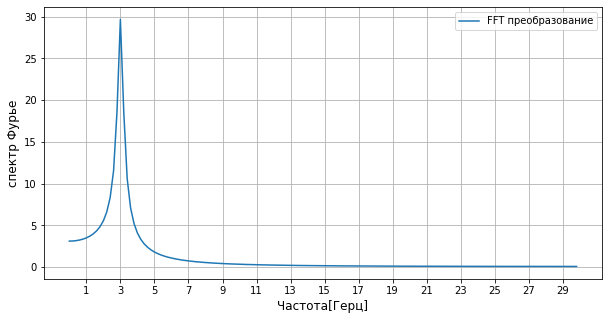

In [18]:
from scipy.fft import fft, fftfreq

yf = fft(y)
xf = fftfreq(N, T/N)[:N//2]
# спект Фурье симметричен относительно нуля, поэтому берем только правую его часть
plt.figure(figsize=(10, 5))
plt.plot(xf, np.abs(yf[0:N//2]),label='FFT преобразование')
plt.xlabel('Частота[Герц]', fontsize=12)
plt.ylabel('спектр Фурье', fontsize=12)
plt.xticks(np.arange(1, np.max(xf), 2))
plt.grid()
plt.legend()
plt.show()

**Виды материнского вейвлета** (ядро преобразования)

In [9]:
for family in pywt.families():
    print(f'{family} family: {pywt.wavelist(family)}')

haar family: ['haar']
db family: ['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']
sym family: ['sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']
coif family: ['coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17']
bior family: ['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']
rbio family: ['rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3

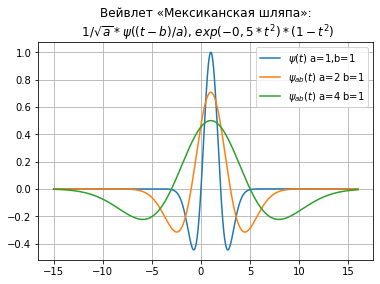

In [10]:
x = np.arange(-15,16,0.01)
def w(a,b,t):    
    f =(1/a**0.5) * np.exp(-0.5*((t-b)/a)**2) * (1 - ((t-b)/a)**2)
    return f
plt.title("Вейвлет «Мексиканская шляпа»:\n $1/\sqrt{a}*\psi({(t-b)}/{a})$, $exp(-0,5*t^{2})*(1 - t^{2})$")

y=[w(1,1,t) for t in x]
plt.plot(x,y,label="$\psi(t)$ a=1,b=1") 
y=[w(2,1,t) for t in x]
plt.plot(x,y,label="$\psi_{ab}(t)$ a=2 b=1")   
y=[w(4,1,t) for t in x]
plt.plot(x,y,label="$\psi_{ab}(t)$ a=4 b=1")   
plt.legend(loc='best')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Morle')

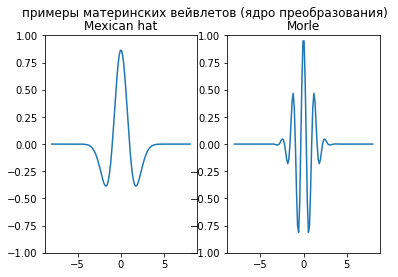

In [11]:
#discrete wavelet
#wavelet_d = pywt.Wavelet('db5')
#[phi, psi, x] = wavelet_d.wavefun(level=1)
#continous wavelet
# The wavefun() method can be used to calculate approximations of scaling function (phi) and wavelet function (psi) at the given level of refinement.
wavelet_c = pywt.ContinuousWavelet('mexh')
[psi,x] = wavelet_c.wavefun(level = 7)
wavelet_c = pywt.ContinuousWavelet('morl')
[psi_morle,x] = wavelet_c.wavefun(level = 7)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('примеры материнских вейвлетов (ядро преобразования) ')

ax1.plot(x, psi)
ax1.set_ylim(-1, 1)
ax1.set_title("Mexican hat")
#Вейвлет «Мексиканская шляпа»:\n$1/\sqrt{a}*exp(-0,5*t^{2}/a^{2})*(t^{2}-1)$")

ax2.plot(x, psi_morle)
ax2.set_ylim(-1, 1)
ax2.set_title("Morle")

In [19]:
scale_max = 50
scales = np.arange(1, scale_max)  # No. of scales

dt = t[1] - t[0]
coef, freqs = pywt.cwt(y, scales, 'mexh',dt)

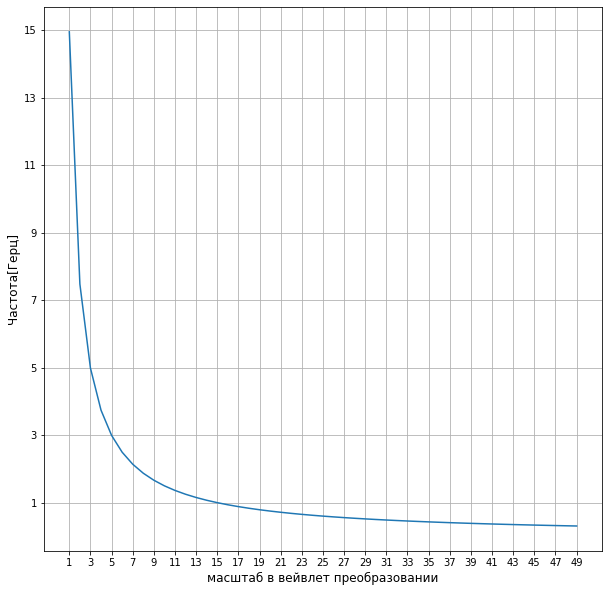

In [20]:
# вейвлет-преобразование построено относительно масштаба материнского вейвлета 
# чтобы вернуться в область частот - необходимо перевести масштаб в частоту! 
f = pywt.scale2frequency('mexh', scales)/(T/N)

# изобразим график зависимости частоты и масштаба 
plt.figure(figsize=(10, 10))
plt.grid()
plt.yticks(np.arange(1, max(freqs)+1, 2))
plt.xticks(np.arange(1, max(scales)+1, 2))
plt.ylabel('Частота[Герц]', fontsize=12)
plt.xlabel('масштаб в вейвлет преобразовании', fontsize=12)
plt.plot(scales, freqs)

Text(0.5, 1.0, 'сигнал в области времени')

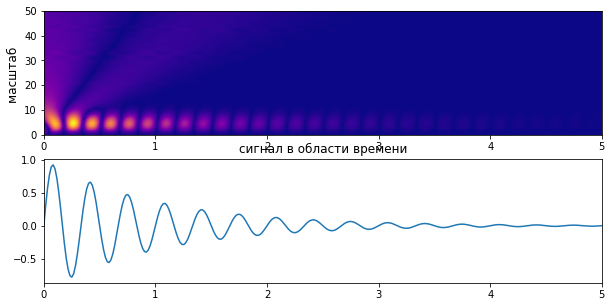

In [21]:
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(211)
plt.imshow(abs(coef), extent=[0, T, scale_max, 0], interpolation='bilinear', cmap='plasma', aspect='auto')
plt.gca().invert_yaxis ()
plt.ylabel('масштаб ', fontsize=12)

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(t,y)
ax2.set_title("сигнал в области времени")

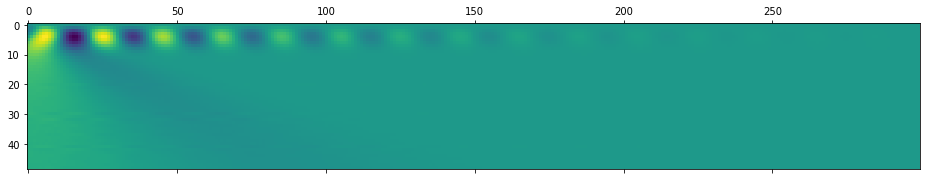

In [22]:
plt.matshow(coef,aspect = 'auto')

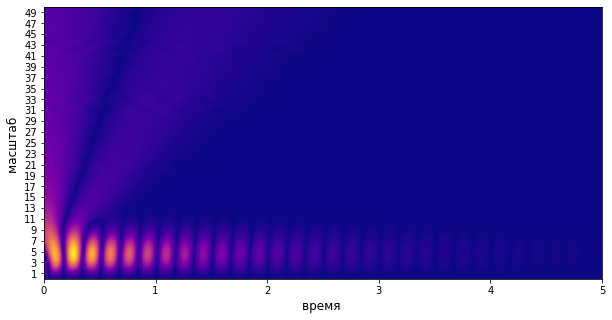

In [23]:
#Plotting scalogram
plt.figure(figsize=(10, 5))
plt.imshow(abs(coef), extent=[0, T, scale_max, 0], interpolation='bilinear', cmap='plasma', aspect='auto')
#plt.imshow(abs(coef), interpolation='bilinear', cmap='plasma', aspect='auto')
plt.gca().invert_yaxis ()
plt.yticks(np.arange(1, scale_max, 2))
plt.ylabel('масштаб ', fontsize=12)
plt.xlabel('время ', fontsize=12)
plt.show()

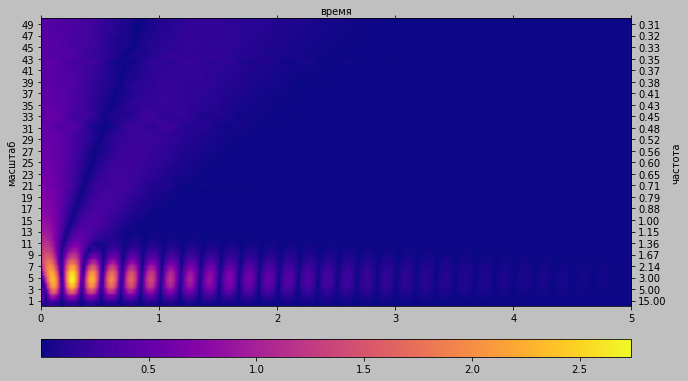

In [24]:
from matplotlib.figure import cbar
from matplotlib.ticker import FuncFormatter

#Plotting dual axis scalogram
test = 'plasma'
f1 = plt.figure(1)
f1.set_size_inches(10, 5)
f1.patch.set_facecolor('#c0c0c0')

import mpl_toolkits.axes_grid1 as axes_grid1
ax1 = axes_grid1.host_axes([0.09, 0.15, 0.82, 0.80])

axc = f1.add_axes([0.09, 0.01, 0.82, 0.05])
im1 = ax1.imshow(abs(coef), cmap=test, aspect='auto', extent=[0, T, scale_max, 0])
ax1.invert_yaxis()
ax1.set_yticks(np.arange(1, scale_max, 2))
cbar.Colorbar(axc, im1, orientation='horizontal')

ax2 = ax1.twin()
# make ticklabels on the top invisible
ax2.axis["top"].toggle(ticklabels=False)

def MyTicks(x, pos):
  x = pywt.scale2frequency('mexh', x)/(T/N)
  return '%2.2f' % x

#fmtr = matplotlib.ticker.FuncFormatter(MyTicks)
fmtr = FuncFormatter(MyTicks)

ax2.yaxis.set_major_formatter(fmtr)
ax2.invert_yaxis()
ax2.set_yticks(np.arange(1, 50, 2))
ax2.set_xlabel('время')
ax2.set_ylabel('частота')
ax1.set_ylabel('масштаб')

plt.show()

*discrete* wavelets

https://discourse.julialang.org/t/plots-with-a-secondary-non-linear-axis-scale/56661
https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

In [ ]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.8/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


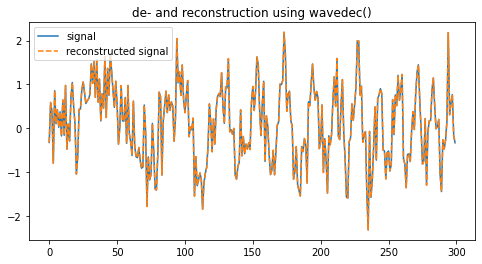

In [ ]:
num = 300
x = np.linspace(0, 1, num=num)
signal = np.sin(25 * np.pi * x**2) + np.random.normal(0, scale=0.5, size=len(x))

coeffs = pywt.wavedec(signal, 'db2', level=8)
reconstructed_signal = pywt.waverec(coeffs, 'db2')
 
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(signal[:num], label='signal')
ax.plot(reconstructed_signal[:num], label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
ax.set_title('de- and reconstruction using wavedec()')
plt.show()

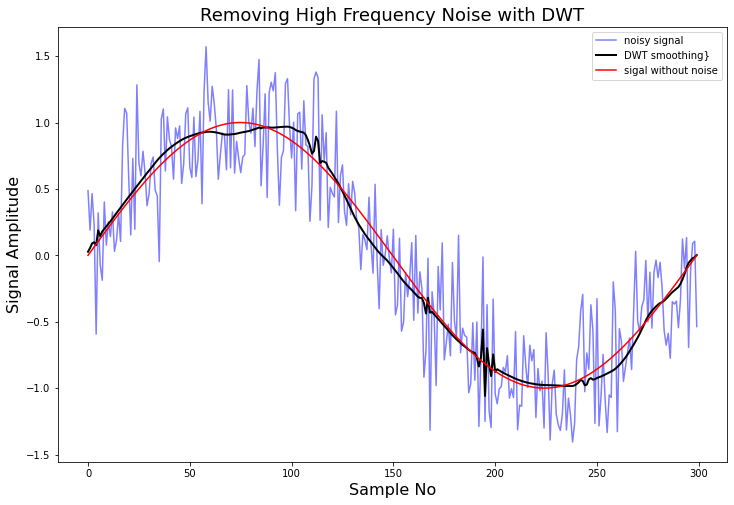

In [ ]:
import random
num = 300
x = np.linspace(0, 1, num=num)
signal = np.sin(2*np.pi * x) + np.random.normal(0, scale=0.3, size=len(x))
signal_ideal = np.sin(2*np.pi * x)
 
def lowpassfilter(signal, thresh = 0.7, wavelet="db4"):
    thresh = thresh * np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal
 
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(signal, color="b", alpha=0.5, label='noisy signal')
rec = lowpassfilter(signal, 0.4)
ax.plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax.plot(signal_ideal, 'r', label='sigal without noise')
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.show()